## Prologue

* **Python for Portfolio Optimization: The Ascent!**

First working lessons to ascend the hilly terrain of Portfolio Optimization in seven strides (Lessons), beginning with the fundamentals (Lesson 1) and climbing slope after slope (Lessons 2-6), to reach the first peak of constrained portfolio optimization models (Lesson 7), amongst a range of peaks waiting beyond!

* **Lesson 1 Fundamentals of Risk and Return of a Portfolio**    

* **Lesson 2 Some Glimpses of Financial Data Wrangling**   

* **Lesson 3 Heuristic Portfolio Selection**  

* **Lesson 4 Traditional Methods for Portfolio Construction**


## Lesson 5


# Mean-Variance Optimization of Portfolios 

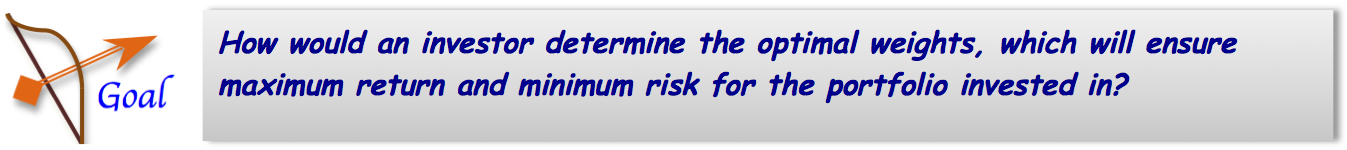

In [1]:
from IPython.display import Image
Image("/kaggle/input/mean-variance-optimization-of-portfolios/Lesson5GoalHeaderImage.png")

## 5.1 Introduction

An investor can take recourse to traditional portfolio construction methods to determine the asset allocation weights.  **Lesson 4 Traditional Methods for Portfolio Construction** discussed two such methods, viz., **Equal weighted portfolio contruction** and **Inverse volatility weighted portfolio construction**.   

However, is there a possibility where the **optimal weights**,  that obtains the **maximum return** of a portfolio  for a **minimal risk**, can be determined? In other words, is it possible for an investor to determine the optimal or the best apportionment of capital to assets in the portfolio, so that the investor reaps maximum return for  a minimum risk? Tough question, indeed! But thankfully, the answer is a firm Yes!  
  
The **Markowitz model** [MAR 52]  built on the **Mean-Variance** framework of asset returns is an elegant solution to this question. Also known as **Mean-Variance Optimization (MVO)**,  the model aims to solve a multi-objective optimization problem subject to basic constraints imposed on the portfolio. 

## 5.2 Mean-Variance Optimization Model

We briefly recall the return and risk of a portfolio that was discussed in **Lesson 1 Fundamentals of risk and return of a portfolio**.     


Let P be a portfolio comprising assets $A_1, A_2,...A_N$ with weights $W_1, W_2,...W_N$ and $\mu_1, \mu_2, ...\mu_N$ as the asset returns. The portfolio return *r*  determined by a weighted summation of its individual asset returns is given by, 

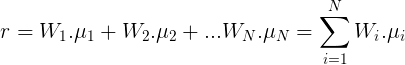

In [2]:
from IPython.display import Image
Image("/kaggle/input/mean-variance-optimization-of-portfolios/Lesson5Eqn5_1.png")

<h5 align="right">.............................(5.1)</h5>

Portfolio risk is the standard deviation of its returns and is given by,

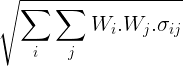

In [3]:
from IPython.display import Image
Image("/kaggle/input/mean-variance-optimization-of-portfolios/Lesson5Eqn5_2.png")

<h5 align="right">..............................(5.2)</h5>

where $\sigma_{i,j}$ is the variance-covariance matrix of returns. 

The Mean-Variance Optimization model is given by:

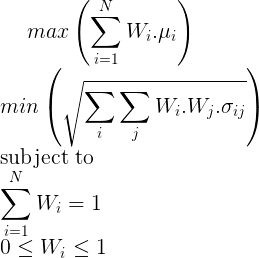

In [4]:
from IPython.display import Image
Image("/kaggle/input/mean-variance-optimization-of-portfolios/Lesson5Eqn5_3.png")

<h5 align="right">..............................(5.3)</h5>

The model works on two **objective functions**,  
(i)  **to maximize expected portfolio return** and   
(ii) **to minimize risk of the portfolio**   
It therefore aims to solve a **non-linear bi-objective optimization problem**.     

The MVO model incorporates the **basic constraints** of   
(i) **the sum of the weights equals 1.**   
    This means that  the investor's capital is fully invested in the portfolio and in such a case,  the portfolio is termed as a **fully invested portfolio**.   
(ii) **the weights $W_i$ lie between 0 and 1.**   
This means that either no capital may be allotted for investment in an asset ($W_i = 0$) or the entire capital may be invested in  an asset ($W_i = 1$) or the capital may be apportioned between assets in the porfolio for weights that range between the interval (0,1).  

## 5.3 Solving the MVO Model

While there are many ways to solve a bi-objective optimization problem, we choose to solve the problem by decomposing it into two three sub-problem models, viz.,   
(i)   obtaining the maximal expected return $R^{MaxRetrn}$ of the portfolio,  subject to basic constraints,  
(ii)  obtaining the optimal expected return $R^{MinRisk}$ corresponding to the minimum risk portfolio,  subject to basic constraints, and finally,   
(iii) obtaining the optimal weights of the portfolio sets that minimize risk and whose returns R lie between $R^{MinRisk}$ and  $R^{MaxRetrn}$, (i.e.)  $R^{MinRisk} \le R \le R^{MaxRetrn}$, subject to basic constraints.    

The optimal portfolio set is referred to as the **efficient set**.


### 5.3.1  Obtaining the Maximal Expected Return of the Portfolio

The mathematical model for this sub-problem is given by, 

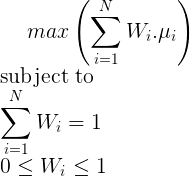

In [5]:
from IPython.display import Image
Image("/kaggle/input/mean-variance-optimization-of-portfolios/Lesson5Eqn5_4.png")

<h5 align="right">.............................(5.4)</h5>

The optimal weights $W_{i}^{Optimal}$ obtained by solving (5.4) is used to compute $R^{MaxRetrn} = \sum{\left(W_{i}^{Optimal}.\mu_i\right)}$

The Python function **MaximizeReturns** employs scipy and NumPy to obtain the optimal weights. Since the problem model is linear, **linprog** function from the package scipy.optimize is invoked to execute **linear programming** to solve the problem model.  

In [6]:
#function obtains maximal return portfolio using linear programming

def MaximizeReturns(MeanReturns, PortfolioSize):
    
    #dependencies
    from scipy.optimize import linprog
    import numpy as np
    
    c = (np.multiply(-1, MeanReturns))
    A = np.ones([PortfolioSize,1]).T
    b=[1]
    res = linprog(c, A_ub = A, b_ub = b, bounds = (0,1), method = 'simplex') 
    
    return res

### 5.3.2  Obtaining the Optimal Expected Return of a Minimum Risk Portfolio

The mathematical model for this sub-problem is given by

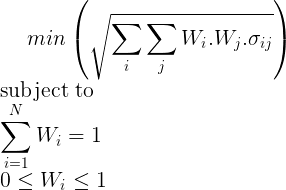

In [7]:
from IPython.display import Image
Image("/kaggle/input/mean-variance-optimization-of-portfolios/Lesson5Eqn5_5.png")

<h5 align="right">..............................(5.5)</h5>

The optimal weights $W_{i}^{Optimal}$ obtained by solving (5.5) is used to compute $R^{MinRisk} = \sum{\left(W_{i}^{Optimal}.\mu_i\right)}$

The Python function **MinimizeRisk** employs scipy.optimize and NumPy to obtain the optimal weights.  

Functions  <b>f</b> and **constraintEq** describe the non-linear objective function and the fully invested constraint described in (5.5),  respectively. **optimize.minimize** function executes minimization of scalar functions with one or more variables. 

In [8]:
#function obtains minimal risk portfolio 

#dependencies
import numpy as np
from scipy import optimize 

def MinimizeRisk(CovarReturns, PortfolioSize):
    
    def  f(x, CovarReturns):
        func = np.matmul(np.matmul(x, CovarReturns), x.T) 
        return func

    def constraintEq(x):
        A=np.ones(x.shape)
        b=1
        constraintVal = np.matmul(A,x.T)-b 
        return constraintVal
    
    xinit=np.repeat(0.1, PortfolioSize)
    cons = ({'type': 'eq', 'fun':constraintEq})
    lb = 0
    ub = 1
    bnds = tuple([(lb,ub) for x in xinit])

    opt = optimize.minimize (f, x0 = xinit, args = (CovarReturns),  bounds = bnds, \
                             constraints = cons, tol = 10**-3)
    
    return opt
    

### 5.3.3   Obtaining the Optimal Weights  for Minimum Risk and  Maximum Return Portfolios

The mathematical model for this sub-problem is defined as follows, where for each R, $R^{MinRisk} \le R \le R^{MaxRetrn}$, the problem model is repeatedly solved to arrive at the optimal weight sets,  each of which determines a portfolio that minimizes risk and maximizes return.  

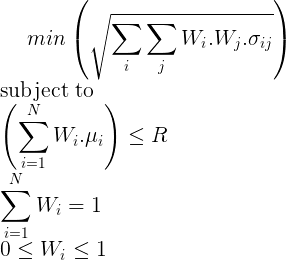

In [9]:
from IPython.display import Image
Image("/kaggle/input/mean-variance-optimization-of-portfolios/Lesson5Eqn5_6.png")

<h5 align="right">..............................(5.6)</h5>

The Python function **MinimizeRiskConstr** employs scipy and NumPy to obtain the optimal weight sets. Functions <b>f</b>, **constraintEq** and **constraintIneq** describe the objective function, equality constraint and inequality constraint of (5.6). Function **optimize.minimize** uses the Trust-Region Constrained algorithm (**method = 'trust-constr'**) to solve the constrained optimization problem with both equality and inequality constraints.   

In [10]:
#function obtains Minimal risk and Maximum return portfolios

#dependencies
import numpy as np
from scipy import optimize 

def MinimizeRiskConstr(MeanReturns, CovarReturns, PortfolioSize, R):
    
    def  f(x,CovarReturns):
         
        func = np.matmul(np.matmul(x,CovarReturns ), x.T)
        return func

    def constraintEq(x):
        AEq=np.ones(x.shape)
        bEq=1
        EqconstraintVal = np.matmul(AEq,x.T)-bEq 
        return EqconstraintVal
    
    def constraintIneq(x, MeanReturns, R):
        AIneq = np.array(MeanReturns)
        bIneq = R
        IneqconstraintVal = np.matmul(AIneq,x.T) - bIneq
        return IneqconstraintVal
    

    xinit=np.repeat(0.1, PortfolioSize)
    cons = ({'type': 'eq', 'fun':constraintEq},
            {'type':'ineq', 'fun':constraintIneq, 'args':(MeanReturns,R) })
    lb = 0
    ub = 1
    bnds = tuple([(lb,ub) for x in xinit])

    opt = optimize.minimize (f, args = (CovarReturns), method ='trust-constr',  \
                        x0 = xinit,   bounds = bnds, constraints = cons, tol = 10**-3)
    
    return  opt
    


## 5.3  Case Study

Let us suppose that an investor decides to invest in a $k$-portfolio ($k$-portfolio 1) comprising the  following  Dow stocks. (Selection of $k$ portfolio 1, is detailed in **Lesson 3 Heuristic Portfolio Selection**)   

**𝑘-portfolio 1**:  

{Coca-Cola (KO), United Health (UNH), Walt Disney (DIS), IBM (IBM), Cisco (CSCO), JPMorgan Chase (JPM), Goldman Sachs (GS), Walgreens Boots Alliance (WBA), Apple (AAPL), Home Depot (HD), American Express (AXP), McDonald's (MCD), Merck (MRK), Boeing (BA), Caterpillar (CAT)}     

The investor desires to explore the optimal portfolio sets that yield maximum expected portfolio return and  minimum risk. The objective is to know the optimal weights given an expected return or a desired risk.  

To apply the MVO model, the historical data set for the $k$-portfolio ( DJIA index: April 11 2014 to April 11, 2019) is cleaned and kept fit for use by the three stage process of optimization discussed in Sec. 5.2. (**Lesson 2 Some glimpses of Financial Data Wrangling** discusses aspects of data cleaning or data wrangling)  

The following Python code reads the dataset concerned, computes the stock returns using the Python function **StockReturnsComputing** and obtains the mean returns and the variance-covariance matrix of returns. (Refer **Lesson 1 Fundamentals of Risk and Return of a Portfolio** to know about risk and return of a portfolio). 



In [11]:
# function computes asset returns 
def StockReturnsComputing(StockPrice, Rows, Columns):
    
    import numpy as np
    
    StockReturn = np.zeros([Rows-1, Columns])
    for j in range(Columns):        # j: Assets
        for i in range(Rows-1):     # i: Daily Prices
            StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])* 100

    return StockReturn

In [12]:
# Obtain optimal portfolio sets that maximize return and minimize risk

#Dependencies
import numpy as np
import pandas as pd


#input k-portfolio 1 dataset comprising 15 stocks
StockFileName = '/kaggle/input/mean-variance-optimization-of-portfolios/DJIA_Apr112014_Apr112019_kpf1.csv'

Rows = 1259  #excluding header
Columns = 15  #excluding date
portfolioSize = Columns #set portfolio size

#read stock prices in a dataframe
df = pd.read_csv(StockFileName,  nrows= Rows)

#extract asset labels
assetLabels = df.columns[1:Columns+1].tolist()
print(assetLabels)

#extract asset prices
StockData = df.iloc[0:, 1:]


#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)


#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#display mean returns and variance-covariance matrix of returns
print('Mean returns of assets in k-portfolio 1\n', meanReturns)
print('Variance-Covariance matrix of returns\n', covReturns)


['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'DIS', 'GS', 'HD', 'IBM', 'JPM', 'KO', 'MCD', 'MRK', 'UNH', 'WBA']
Mean returns of assets in k-portfolio 1
 [ 0.09   0.029  0.1    0.039  0.081  0.04   0.033  0.085 -0.016  0.06
  0.019  0.057  0.036  0.095 -0.002]
Variance-Covariance matrix of returns
 [[2.375 0.672 0.962 1.042 0.999 0.68  0.954 0.726 0.709 0.825 0.306 0.458
  0.534 0.774 0.697]
 [0.672 1.648 0.8   0.95  0.7   0.569 1.065 0.658 0.663 1.001 0.307 0.35
  0.556 0.718 0.667]
 [0.962 0.8   2.288 1.31  0.89  0.716 1.066 0.747 0.777 0.977 0.381 0.472
  0.578 0.745 0.679]
 [1.042 0.95  1.31  2.733 1.041 0.688 1.321 0.796 0.885 1.169 0.358 0.455
  0.616 0.72  0.681]
 [0.999 0.7   0.89  1.041 1.789 0.713 0.927 0.724 0.817 0.909 0.362 0.477
  0.647 0.656 0.707]
 [0.68  0.569 0.716 0.688 0.713 1.35  0.773 0.586 0.574 0.717 0.302 0.368
  0.466 0.557 0.631]
 [0.954 1.065 1.066 1.321 0.927 0.773 2.114 0.795 0.803 1.554 0.303 0.467
  0.705 0.82  0.819]
 [0.726 0.658 0.747 0.796 0.724 0.586 0.795 1

As the first stage to executing the MVO, the mathematical model discussed in Sec. 5.3.1 is applied to the dataset concerned and the maximum expected portfolio return $R^{MaxRetrn}$ is obtained. The following Python code shows the invocation of function **MaximizeReturns** to arrive at the maximum return. 

In [13]:
#Maximal expected portfolio return computation for the k-portfolio
result1 = MaximizeReturns(meanReturns, portfolioSize)
maxReturnWeights = result1.x
maxExpPortfolioReturn = np.matmul(meanReturns.T, maxReturnWeights)
print("Maximal Expected Portfolio Return:   %7.4f" % maxExpPortfolioReturn )


Maximal Expected Portfolio Return:    0.0997


In the second stage, the mathematical model discussed in Sec. 5.3.2 is applied to the dataset and $R^{MinRisk}$,  the expected portfolio return corresponding to the minimum risk is determined. The following Python code shows the invocation of function **MinimizeRisk** to arrive at the return corresponding to minimum risk.  

In [14]:
#expected portfolio return computation for the minimum risk k-portfolio 
result2 = MinimizeRisk(covReturns, portfolioSize)
minRiskWeights = result2.x
minRiskExpPortfolioReturn = np.matmul(meanReturns.T, minRiskWeights)
print("Expected Return of Minimum Risk Portfolio:  %7.4f" % minRiskExpPortfolioReturn)


Expected Return of Minimum Risk Portfolio:   0.0361


In the third stage, the mathematical model discussed in Sec. 5.3.3 is applied,  employing function **MinimizeRiskConstr**. The following Python code shows the repeated invocation of the function controlled by a **while** loop that varies from **low** to **high** in steps of **increment = 0.001**. Here **low** and **high** denote $R^{MinRisk}$ and $R^{MaxReturn}$ respectively. The loop therefore executes (5.6) repeatedly varying R as defined by $R^{MinRisk} \le R \le R^{MaxRetrn}$.   

In [15]:
#compute efficient set for the maximum return and minimum risk portfolios
increment = 0.001
low = minRiskExpPortfolioReturn
high = maxExpPortfolioReturn

#initialize optimal weight set and risk-return point set
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]

#repeated execution of function MinimizeRiskConstr to determine the efficient set 
while (low < high):
    
    result3 = MinimizeRiskConstr(meanReturns, covReturns, portfolioSize, low)
    xOptimal.append(result3.x)
    expPortfolioReturnPoint.append(low)
    low = low+increment
    
#gather optimal weight set    
xOptimalArray = np.array(xOptimal)

#obtain annualized risk for the efficient set portfolios 
#for trading days = 251
minRiskPoint = np.diagonal(np.matmul((np.matmul(xOptimalArray,covReturns)),\
                                     np.transpose(xOptimalArray)))
riskPoint =   np.sqrt(minRiskPoint*251) 

#obtain expected portfolio annualized return for the 
#efficient set portfolios, for trading days = 251
retPoint = 251*np.array(expPortfolioReturnPoint) 

#display efficient set portfolio parameters
print("Size of the  efficient set:", xOptimalArray.shape )
print("Optimal weights of the efficient set portfolios: \n", xOptimalArray)
print("Annualized Risk and Return of the efficient set portfolios: \n", \
                                                np.c_[riskPoint, retPoint])

/opt/conda/lib/python3.6/site-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


Size of the  efficient set: (64, 15)
Optimal weights of the efficient set portfolios: 
 [[ 0.028  0.039  0.023  0.017  0.026  0.103  0.017  0.05   0.032  0.021
   0.319  0.192  0.062  0.047  0.025]
 [ 0.028  0.039  0.023  0.017  0.026  0.108  0.017  0.051  0.032  0.022
   0.311  0.192  0.063  0.047  0.025]
 [ 0.029  0.039  0.024  0.017  0.027  0.108  0.017  0.052  0.031  0.022
   0.309  0.192  0.062  0.048  0.024]
 [ 0.03   0.039  0.025  0.017  0.027  0.107  0.017  0.053  0.03   0.022
   0.306  0.192  0.062  0.049  0.024]
 [ 0.031  0.038  0.024  0.016  0.028  0.086  0.016  0.059  0.028  0.022
   0.316  0.197  0.06   0.056  0.023]
 [ 0.033  0.039  0.027  0.017  0.029  0.103  0.017  0.06   0.028  0.023
   0.294  0.185  0.064  0.056  0.023]
 [ 0.034  0.039  0.028  0.017  0.03   0.102  0.017  0.063  0.027  0.023
   0.29   0.184  0.064  0.059  0.023]
 [ 0.035  0.038  0.03   0.017  0.031  0.101  0.017  0.066  0.026  0.024
   0.285  0.183  0.064  0.062  0.022]
 [ 0.036  0.038  0.031  0.018  0

The efficient set comprises 64 different optimal portfolios. Each of the optimal weight sets can be seen to satisfy all the constraints imposed on them. The optimal weight sets and the annualized risk(%) and return (%) of each of the optimal portfolios,  are now available to the investor for making prudent decisions on the portfolios.  

To get back to the investor's objective, if a risk seeking investor aspires to get an annual return of *y*% mindless of the risk involved, then the efficient set allows selecting that portfolio whose risk-return point is [x%, y%] for some x% risk. The corresponding optimal weight set indicates how the investor should apportion the capital on the various assets comprising the $k$-portfolio, to reap the return desired.  

In contrast, a risk-averse investor who is too concerned about the risk and hence fixes a risk of x%,  can also get to know about the corresponding return (y%) that the portfolio will fetch for that risk, besides knowing about the  optimal weights that are  required for making such an investment.   
  
 The efficient set therefore provides a gamut of optimal investment decisions to suit the investor's risk appetite.   

**Example**  

To keep it simple, let us consider a risk averse investor who desires to invest in the aforementioned $k$-portfolio of Dow stocks, with the lowest risk possible.  The efficient set lists the pair [11.571  9.049]  which is the first pair in the efficient set output, offering the lowest annualized risk of 11.571%. If the investor agrees to this risk, then the investor can expect an   annual return of 9.049%. The optimal weights that will effect this are as follows:
   [0.028  0.039  0.023  0.017  0.026  0.103  0.017  0.05   0.032  0.021
   0.319  0.192  0.062  0.047  0.025].   
   
To elaborate further, if the investor owns a capital of USD10000,  to gain an annual expected return of 9.049% holding an annualized risk of 11.571%, the investor will have to allot  the capital to the assets in the $k$-portfolio, in the following manner:
   
['AAPL', 2.8%],  ['AXP', 3.9%],   ['BA', 2.3%],  ['CAT', 1.7%],  ['CSCO', 2.6%],  ['DIS', 10.3%],   ['GS', 1.7%],    ['HD', 5%],  ['IBM', 3.2%],  ['JPM', 2.1%],  ['KO', 31.9%],    ['MCD', 19.2%],  ['MRK', 6.2%], ['UNH', 4.7%],  ['WBA', 2.5%]

## 5.4  Efficient Frontier

The efficient set obtained by the Mean-Variance Optimization model can be graphically represented by what is called an **efficient frontier**. An efficient frontier is a **risk-return tradeoff graph**, which describes a set of optimal portfolios that yield the highest expected  portfolio return for a  defined level of risk or the lowest possible risk for a  defined level of expected portfolio return. It graphs the optimal structure of the portfolio which yields the maximum expected return for a given level of risk or vice-versa.   

Portfolio optimization  strives to build portfolios which are on the efficient frontier and not below it, for these are sub-optimal. The set of all optimal portfolios that lie on the efficient frontier, in other words,  those portfolios that generate the largest return for a given level of risk or vice-versa, are also known as the **Markowitz efficient set**. 

Given the efficient set, generated for the $k$-portfolio of Dow stocks discussed in Sec. 5.3, the following Python code traces the efficient frontier using **matplotlib** library.

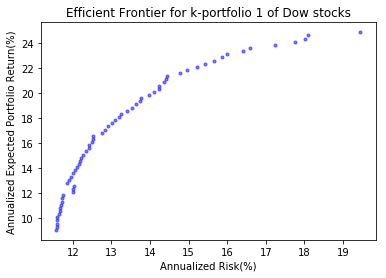

In [16]:
#Graph Efficient Frontier
import matplotlib.pyplot as plt

NoPoints = riskPoint.size

colours = "blue"
area = np.pi*3

plt.title('Efficient Frontier for k-portfolio 1 of Dow stocks')
plt.xlabel('Annualized Risk(%)')
plt.ylabel('Annualized Expected Portfolio Return(%)' )
plt.scatter(riskPoint, retPoint, s=area, c=colours, alpha =0.5)
plt.show()



The efficient frontier for a portfolio serves to provide a road-map for the choices that investors can make,  based on their risk appetites.  
  
For a specific annualized risk (x%) or a range of values desired by the investor,  the corresponding annualized expected portfolio return (y%) or a range of return values or vice-versa,  can be easily obtained by a visual inspection of the graph.   The point(s) of intersection on the efficient frontier which represent(s) the optimal portfolios,  can be easily decoded to arrive at the optimal weights which determine the optimal allocations of capital to the assets in the portfolio, corresponding to the choice of risk or return.   

Fig. 5.1 illustrates how an efficient frontier can direct a risk-seeking investor who desires an annualized expected return of 20%,  to invest in a portfolio that holds a 14% annualized risk, while enlightening the investor on the optimal weights which will ensure the aspired risk/return.  

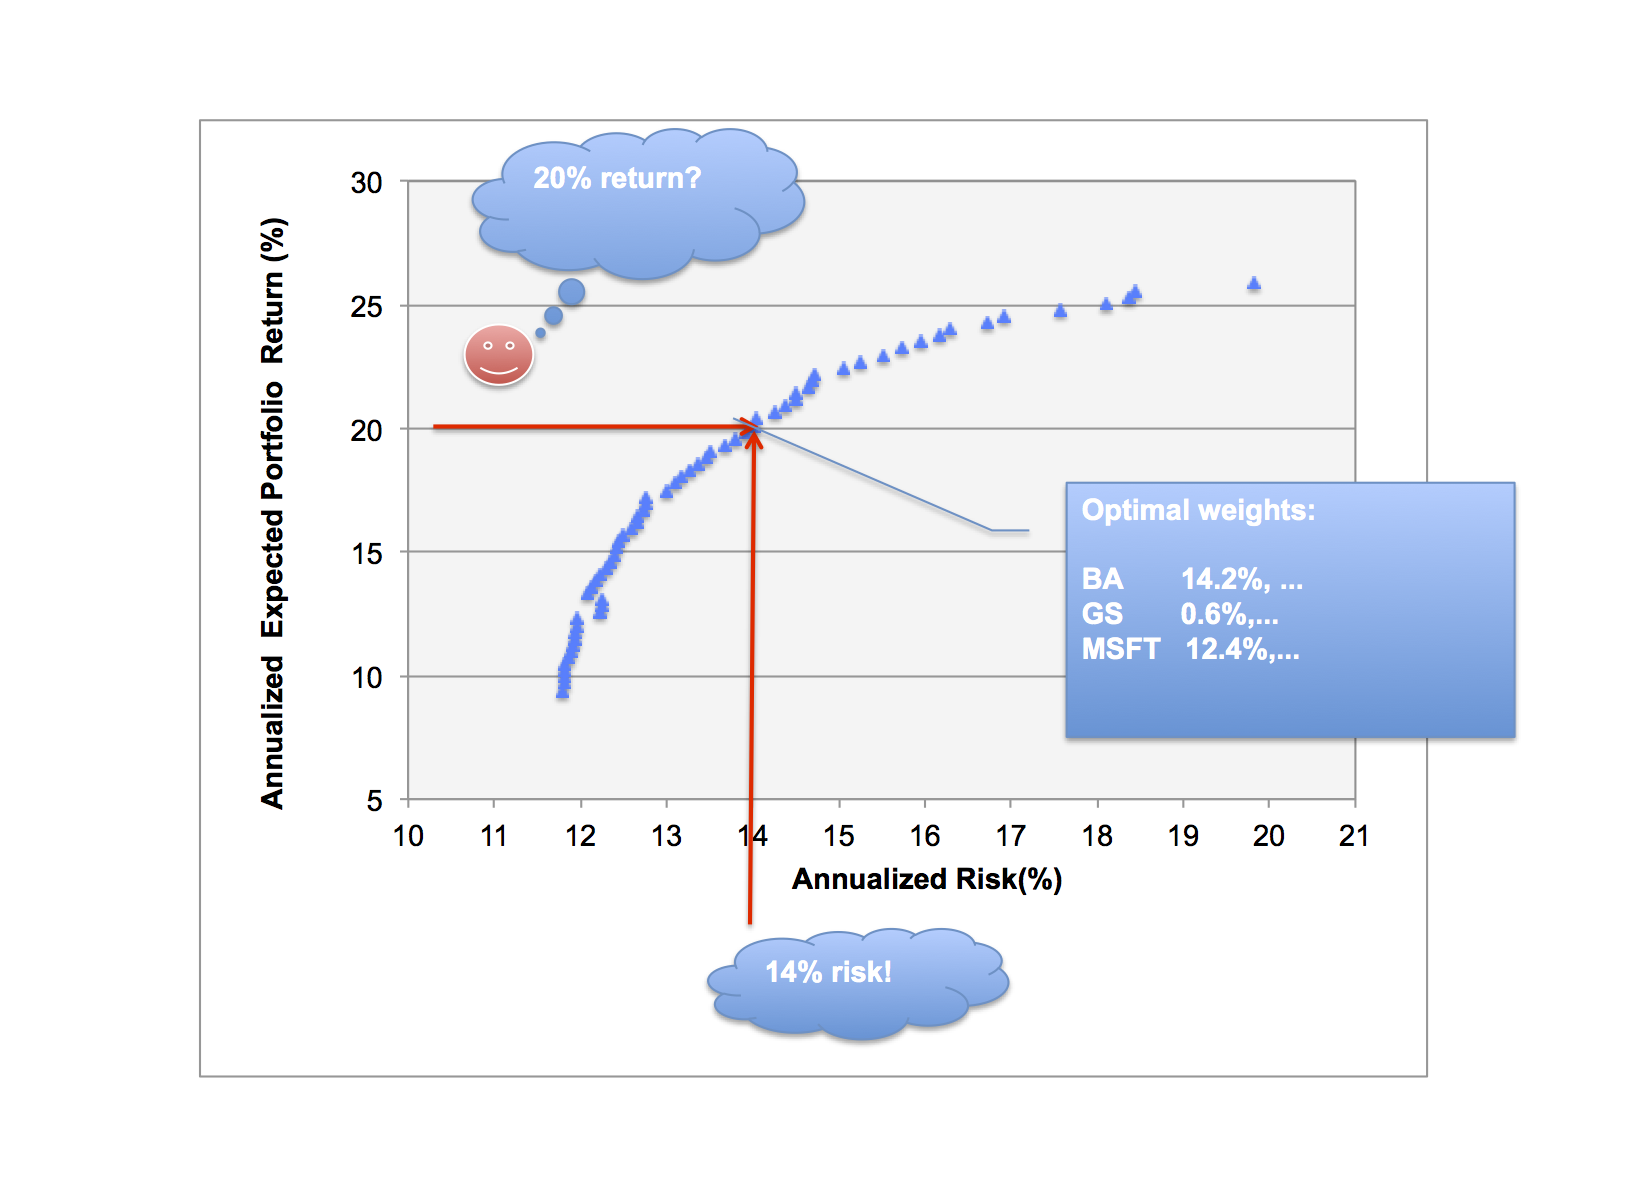

In [17]:
from IPython.display import Image
Image("/kaggle/input/mean-variance-optimization-of-portfolios/Lesson5Fig5_1.png")


#### Fig. 5.1 Usefulness of efficient frontiers to investors - an illustration

## 5.5  Efficient Frontiers: $k$-portfolios vs "Ideal" portfolio

**Lesson 3 Heuristic Portfolio Selection** discussed three different selections of $k$-portfolios comprising Dow stocks. Labelled as $k$-portfolio 1, 2 and 3, the behaviour of these portfolios were compared with  that of an "ideal" portfolio where the investor decides to invest in all the stocks of the "mini-universe". The observations discussed in Sec. 4.4 of **Lesson 4 Traditional Methods for Portfolio Construction** showed that $k$-portfolios were endowed with merits that rendered them advantageous to the investors.   
  
 In this lesson, we investigate the  risk-return trade-off behaviour of the $k$-portfolios, by tracing their efficient frontiers and comparing the same with that of the  "ideal" portfolio. The Mean-Variance Optimization model was applied over all the portfolios. Fig. 5.2 illustrates the efficient frontiers traced for $k$-portfolio 1, $k$-portfolio 2, $k$-portfolio 3 and the "ideal" portfolio, over the DJIA Index data set (April 2014 - April 2019).  
   
The CSV files DJIA_Apr112014_Apr112019_kpf1.csv, DJIA_Apr112014_Apr112019_kpf2.csv, DJIA_Apr112014_Apr112019_kpf3.csv hold the datasets for the respective $k$-portfolios 1,2 and 3, and DJIA_Apr112014_Apr112019.csv, the dataset for the Dow "mini-universe".     
   
 The proximity of the $k$-portfolio efficient frontiers to that of the "ideal" portfolio reveals the similarity of  risk-return trade-off behaviour of the $k$-portfolios,  to that of the "ideal" portfolio. The proximity of the $k$-portfolio efficient frontiers to one another, also reveals the similarity of their portfolio behaviour despite holding different sets of assets that were randomly selected, one  from each of the clusters, during their construction. (Refer Sec 3.4 of  **Lesson 3 Heuristic Portfolio Selection** for the construction of $k$-portfolios of Dow stocks)

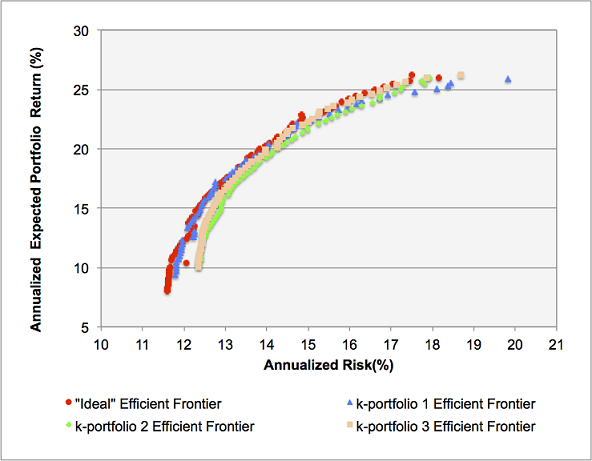

In [18]:
from IPython.display import Image
Image("/kaggle/input/mean-variance-optimization-of-portfolios/Lesson5Fig5_2.png")


#### Fig. 5.2 Performance Comparison of efficient frontiers of $k$-portfolios with the "ideal" efficient frontier,  for DJIA Index (April 2014-Aprl 2019)

The efficient frontiers traced by the Mean-Variance Optimization model or known as the Markowitz model,  are termed as “exact” or “ideal” in the literature. The Markowitz model merely deals with basic constraints imposed over a bi-criterion objective function. The model can be easily solved using a variety of traditional methods including the one discussed in this lesson.  

In reality, portfolio optimization problem models can turn too complex for direct solving by traditional methods. Thus when constraints reflective of investor preferences or  investment strategies or  market norms or religious laws etc.,  are included,  the problem models can turn complex,  warranting the need to look for non-traditional, nature-inspired  methods, referred to as **metaheuristics** in recent literature, to arrive at acceptable if not accurate solutions.  In the face of these models, a Markowitz model is often dubbed as an “Unconstrained Optimization” problem for it can be easily solved with the simplest of the traditional techniques.

### Companion Reading

  

This blog  is an abridged adaptation of concepts discussed in Chapter 1 and Chapter 3 of [PAI 18] to Dow Jones dataset (DJIA index: April, 2014- April, 2019) and implemented in Python. Readers (read "worker bees"),  seeking more information may refer to the corresponding chapter in the  book.


<h3 align="left">References</h3>   

[MAR 52]   Markowitz H., Portfolio Selection, *The Journal of Finance*, vol. 7, no. 1, 
           pp. 77-91, Mar., 1952.  
  
  
[PAI 18]   Vijayalakshmi Pai G. A., Metaheuristics for Portfolio Optimization- *An Introduction using MATLAB*, Wiley-ISTE, 2018. https://www.mathworks.com/academia/books/metaheuristics-for-portfolio-optimization-pai.html  
  
**GitHub Repository**    

PythonFinance-PortfolioOptimization https://github.com/PaiViji


## Next...

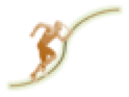

In [19]:
from IPython.display import Image
Image("/kaggle/input/mean-variance-optimization-of-portfolios/Lesson5ExitTailImage.png")

**Lesson 6: Sharpe Ratio based Portfolio Optimization**   

(Goal: If a portfolio with higher Sharpe Ratio than its counterparts, is considered superior to them, then how does one invest in the assets of the portfolio, to ensure maximal Sharpe Ratio?)  
  
Kaggle Kernel: Sharpe Ratio Based Portfolio Optimization